# TASK2:Movie_Rating_Prediction

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Data Collection And Overview

In [ ]:
movies_data = pd.read_csv("/content/drive/MyDrive/CODSOFT/IMDb_Movies_India.csv", encoding='ISO-8859-1')
movies_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
print("Rows:", movies_data.shape[0])
print("\nColumns", movies_data.shape[1])


Rows: 15509

Columns 10


In [ ]:
movies_data.columns.tolist()


['Name',
 'Year',
 'Duration',
 'Genre',
 'Rating',
 'Votes',
 'Director',
 'Actor 1',
 'Actor 2',
 'Actor 3']

In [ ]:
movies_data.isnull().sum().values.sum()


33523

In [ ]:
movies_data.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

In [ ]:
movies_data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
movies_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Data Preprocessing

In [ ]:
movies_data.dropna(subset=['Name','Year','Duration','Votes','Rating'],inplace=True)
movies_data.isnull().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

In [ ]:
movies_data['Year'] = movies_data['Year'].str.strip('()').astype(int)

In [ ]:
movies_data['Votes'] = movies_data['Votes'].str.replace(',', '').astype(int)

In [ ]:
movies_data['Duration'] = movies_data['Duration'].str.replace('min', '').astype(int)

In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int64  
 2   Duration  5851 non-null   int64  
 3   Genre     5820 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int64  
 6   Director  5850 non-null   object 
 7   Actor 1   5776 non-null   object 
 8   Actor 2   5734 non-null   object 
 9   Actor 3   5688 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 502.8+ KB


In [ ]:
movies_data.describe()

,Year,Duration,Rating,Votes
count,5851.000000,5851.000000,5851.000000,5851.000000
mean,1996.416852,132.294480,5.931875,2611.273116
std,19.914640,26.555826,1.389942,13433.828528
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,117.000000,5.000000,28.000000
50%,2002.000000,134.000000,6.100000,119.000000
75%,2013.000000,150.000000,7.000000,862.500000
max,2021.000000,321.000000,10.000000,591417.000000


In [ ]:
movies_data.drop('Genre',axis=1,inplace=True)

In [ ]:
movies_data.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


# Exploratory Data Analysis

<Axes: xlabel='Duration', ylabel='Rating'>

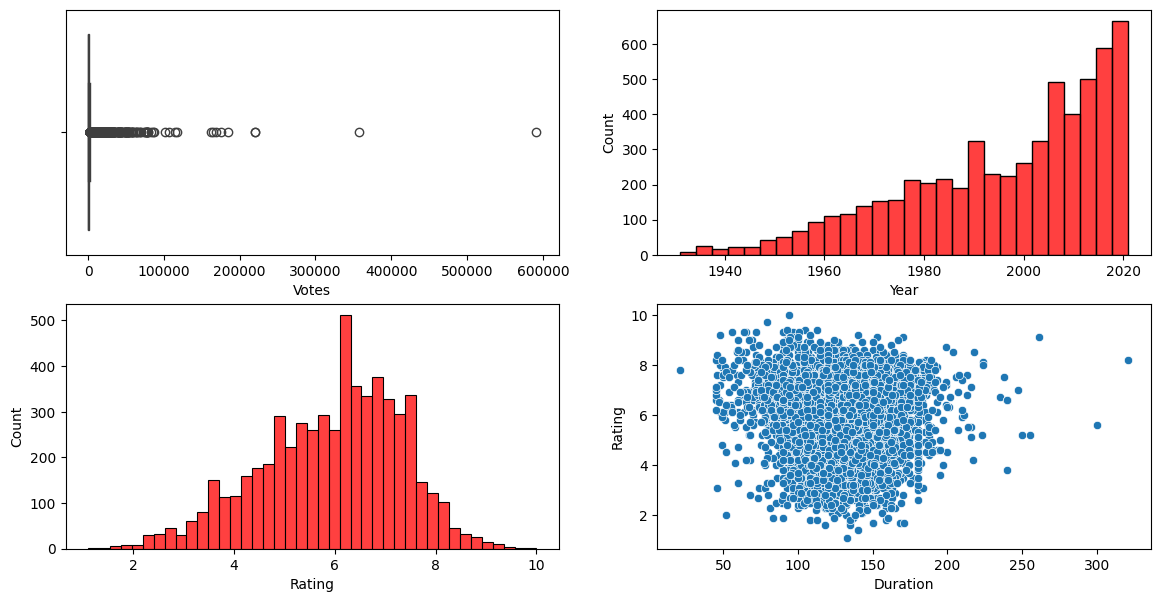

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Votes', data=movies_data)

plt.subplot(2,2,2)
sns.histplot(movies_data['Year'], color='red')

plt.subplot(2,2,3)
sns.histplot(movies_data['Rating'], color='red')

plt.subplot(2,2,4)
sns.scatterplot(x=movies_data['Duration'], y=movies_data['Rating'], data=movies_data)



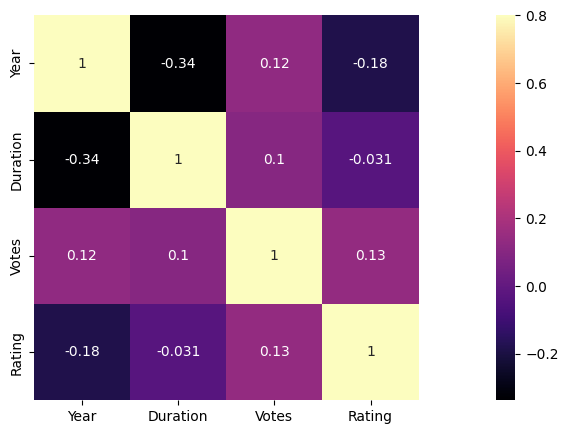

In [ ]:
corr_columns=['Year','Duration','Votes','Rating']
corrmat = movies_data[corr_columns].corr()
fig = plt.figure(figsize=(20,5))

sns.heatmap(corrmat, cmap='magma', vmax=.8, square=True, annot=True)
plt.show()

In [ ]:
movies_data.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


# Feature Selection

In [ ]:
movies_data.drop(['Name','Director','Actor 1','Actor 2','Actor 3'], axis=1,inplace=True)
movies_data.head()

,Year,Duration,Rating,Votes
1,2019,109,7.0,8
3,2019,110,4.4,35
5,1997,147,4.7,827
6,2005,142,7.4,1086
8,2012,82,5.6,326


In [ ]:
features = movies_data[['Year','Duration','Votes']]
target = movies_data['Rating']

In [ ]:
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.2,random_state=1000)

# Model Buiding

In [ ]:
# Create a pipeline with standard scaling and Linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', LinearRegression())
])

In [ ]:
pipeline.fit(feature_train, target_train)

Pipeline(steps=[('scaler', StandardScaler()), ('sgd', LinearRegression())])

In [ ]:
predction = pipeline.predict(feature_test)

### Model Evaluation:

In [ ]:
mae = mean_absolute_error(target_test, predction)
mse = mean_squared_error(target_test, predction)
r2 = r2_score(target_test, predction)

In [ ]:
print(" Mean Absolute Error:", mae)
print(" Mean Squared Error:", mse)
print(" R-squared:", r2)

 Mean Absolute Error: 1.0392644142557654
 Mean Squared Error: 1.8012171056951014
 R-squared: 0.013096436185886629


# Model Deployment:

In [ ]:
new_input = pd.DataFrame({
    'Year': [2010],
    'Duration': [150],
    'Votes': [1966],
})

predicted_rating = pipeline.predict(new_input)
predicted_rating = np.clip(predicted_rating, 0, 10)


print("Predicted Rating:", predicted_rating)


Predicted Rating: [5.52362593]
